In [1]:
#for EDA:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#for geocoding:
from pygeocoder import Geocoder
from pygeocoder import GeocoderError
import numpy as np
import time

%matplotlib inline
pd.set_option('display.max_columns', 50)

/Users/tamaraosifchin/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#read in and concatenate the 3 excel files of call data
all_calls = pd.read_excel("datasci4good_2015-12-22_1_of_3.xls")\
                         .append(pd.read_excel("datasci4good_2015-12-22_2_of_3.xls"))\
                         .append(pd.read_excel("datasci4good_2015-12-22_3_of_3.xls"))

In [3]:
all_calls.shape

(47302, 23)

In [4]:
all_calls.head(3)

,Reason,Case Note Date,[Caller] ZipCode,[Caller] Title,[Caller] Mailing Address,[Caller] City,[Caller] State,Service,[Caller] Borough,Reason 2,[Caller] DOB,[Caller] Date of Birth,Reason 3,[Caller] Age,Reason 4,Reason 5,[Caller] Gender,[Caller] Education,Contact Type,Location,[Caller] Race,[Caller] Primary Language,[Caller] Secondary Language
0,Left Message,2015-12-22,10128,NaN,502 East 88th Street #5C,New York,NY,Admin,Manhattan,NaN,Given,1955-05-06 00:00:00,NaN,60,NaN,NaN,Female,Bachelor Degree,Follow-up,Phone,White,English,NaN
1,Home Care/Companion/Aide,2015-12-22,NaN,NaN,NaN,NaN,NY,I/R,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,Not Appropriate for the call,New,Phone,Unknown,English,NaN
2,Training-Dementia Care Tx for Professionals,2015-12-22,NaN,NaN,NaN,NaN,NY,I/R,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,Not Appropriate for the call,New,Phone,Unknown,English,NaN


In [5]:
all_calls.rename(columns=lambda x: x.replace(" ","_"),inplace=True)
all_calls.rename(columns=lambda x: x.replace("[",""),inplace=True)
all_calls.rename(columns=lambda x: x.replace("]",""),inplace=True)

In [6]:
all_calls.columns.values

array([u'Reason', u'Case_Note_Date', u'Caller_ZipCode', u'Caller_Title',
       u'Caller_Mailing_Address', u'Caller_City', u'Caller_State',
       u'Service', u'Caller_Borough', u'Reason_2', u'Caller_DOB',
       u'Caller_Date_of_Birth', u'Reason_3', u'Caller_Age', u'Reason_4',
       u'Reason_5', u'Caller_Gender', u'Caller_Education', u'Contact_Type',
       u'Location', u'Caller_Race', u'Caller_Primary_Language',
       u'Caller_Secondary_Language'], dtype=object)

In [7]:
print sum(all_calls.Caller_Borough.value_counts())
all_calls.Caller_Borough.value_counts()

33674


Manhattan        12588
Brooklyn          8192
Queens            7439
Bronx             4521
Staten Island      934
dtype: int64

In [8]:
sum(all_calls[all_calls.Caller_Borough == 'Staten Island'].Caller_Mailing_Address.isnull())

72

In [9]:
all_calls.head(3)

,Reason,Case_Note_Date,Caller_ZipCode,Caller_Title,Caller_Mailing_Address,Caller_City,Caller_State,Service,Caller_Borough,Reason_2,Caller_DOB,Caller_Date_of_Birth,Reason_3,Caller_Age,Reason_4,Reason_5,Caller_Gender,Caller_Education,Contact_Type,Location,Caller_Race,Caller_Primary_Language,Caller_Secondary_Language
0,Left Message,2015-12-22,10128,NaN,502 East 88th Street #5C,New York,NY,Admin,Manhattan,NaN,Given,1955-05-06 00:00:00,NaN,60,NaN,NaN,Female,Bachelor Degree,Follow-up,Phone,White,English,NaN
1,Home Care/Companion/Aide,2015-12-22,NaN,NaN,NaN,NaN,NY,I/R,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,Not Appropriate for the call,New,Phone,Unknown,English,NaN
2,Training-Dementia Care Tx for Professionals,2015-12-22,NaN,NaN,NaN,NaN,NY,I/R,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,Not Appropriate for the call,New,Phone,Unknown,English,NaN


In [10]:
sum(all_calls.Caller_Mailing_Address.isnull())

9603

In [11]:
all_calls.Caller_State.value_counts()

NY    45220
NJ      581
CA      163
MA      143
FL      134
CT      133
NC      103
PA       96
MD       95
TX       66
VA       63
DC       50
GA       49
NM       26
SC       23
CO       23
OH       15
MN       15
WA       13
ME       13
OR       13
AL       13
IL       12
RI       12
AZ       11
MI        9
VT        9
MO        6
TN        6
WV        3
WI        3
PR        3
NV        3
ND        2
LA        2
AR        1
NU        1
DE        1
ID        1
NH        1
NL        1
IN        1
dtype: int64

In [12]:
all_calls.Caller_City.value_counts()

New York                  12475
Brooklyn                   8618
Bronx                      4792
Staten Island               957
Flushing                    895
Jamaica                     761
Forest Hills                545
Astoria                     409
Woodside                    369
Jackson Heights             352
Bayside                     291
Elmhurst                    257
East Elmhurst               236
Far Rockaway                211
Ridgewood                   203
Rosedale                    200
Rego Park                   186
Long Island City            183
Sunnyside                   174
Fresh Meadows               166
Corona                      156
Howard Beach                156
Kew Gardens                 155
Queens Village              150
NYC                         138
Whitestone                  137
Maspeth                     115
Ozone Park                  112
South Richmond Hill         106
Springfield Gardens         106
                          ...  
Amherst 

In [13]:
ny_calls = all_calls[all_calls.Caller_State == 'NY']
ny_calls.Caller_City.value_counts()

New York                  12460
Brooklyn                   8613
Bronx                      4784
Staten Island               957
Flushing                    895
Jamaica                     761
Forest Hills                545
Astoria                     405
Woodside                    369
Jackson Heights             352
Bayside                     291
Elmhurst                    257
East Elmhurst               236
Far Rockaway                211
Rosedale                    200
Ridgewood                   196
Rego Park                   186
Long Island City            183
Sunnyside                   174
Fresh Meadows               166
Corona                      156
Howard Beach                156
Kew Gardens                 155
Queens Village              150
NYC                         138
Whitestone                  137
Maspeth                     115
Ozone Park                  112
Woodhaven                   106
Springfield Gardens         106
                          ...  
Croton-o

/Users/tamaraosifchin/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


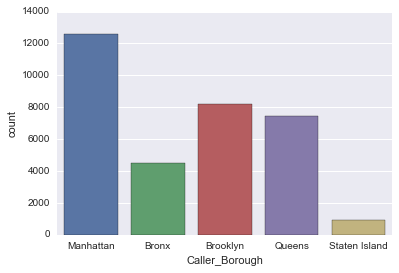

In [15]:
sns.countplot(x="Caller_Borough", data=all_calls)

In [16]:
###########
#Here's the code to read in a single excel file and make a call to google for the geocodes, 2300 per execution,
#one address per call:
###########

In [17]:
#read in one excel file of call data
all_calls = pd.read_excel("datasci4good_2015-12-22_1_of_3.xls")
                         #Tamara to take: ("datasci4good_2015-12-22_2_of_3.xls"))\
                         #Gordon or Brian to take:("datasci4good_2015-12-22_3_of_3.xls"))

In [18]:
#rename columns so they are easier to work with
all_calls.rename(columns=lambda x: x.replace(" ","_"),inplace=True)
all_calls.rename(columns=lambda x: x.replace("[",""),inplace=True)
all_calls.rename(columns=lambda x: x.replace("]",""),inplace=True)

In [19]:
#add columns for id number in case we ever have to put the records back in the original order
num_file = 1 #change to 2 and 3 for 2nd and 3rd files
all_calls['file_num'] = num_file
rec_num = range(0,len(all_calls),1)
all_calls['rec_id'] = rec_num

In [20]:
all_calls.head(3)

,Reason,Case_Note_Date,Caller_ZipCode,Caller_Title,Caller_Mailing_Address,Caller_City,Caller_State,Service,Caller_Borough,Reason_2,Caller_DOB,Caller_Date_of_Birth,Reason_3,Caller_Age,Reason_4,Reason_5,Caller_Gender,Caller_Education,Contact_Type,Location,Caller_Race,Caller_Primary_Language,Caller_Secondary_Language,file_num,rec_id
0,Left Message,2015-12-22,10128,NaN,502 East 88th Street #5C,New York,NY,Admin,Manhattan,NaN,Given,1955-05-06,NaN,60,NaN,NaN,Female,Bachelor Degree,Follow-up,Phone,White,English,NaN,1,0
1,Home Care/Companion/Aide,2015-12-22,NaN,NaN,NaN,NaN,NY,I/R,NaN,NaN,Unknown,NaT,NaN,NaN,NaN,NaN,Unknown,Not Appropriate for the call,New,Phone,Unknown,English,NaN,1,1
2,Training-Dementia Care Tx for Professionals,2015-12-22,NaN,NaN,NaN,NaN,NY,I/R,NaN,NaN,Unknown,NaT,NaN,NaN,NaN,NaN,Unknown,Not Appropriate for the call,New,Phone,Unknown,English,NaN,1,2


In [21]:
#split into 2 files for eto and cn
#next time split at 8001 so the first file ends at 8000 not 7999
#all_calls[:8000].to_csv("datasci4good_2015-12-22_1_of_3_eto.csv",index=False, encoding='utf-8')
#all_calls[8000:].to_csv("datasci4good_2015-12-22_1_of_3_cn.csv",index=False, encoding='utf-8')


In [22]:
###########
#First some code to weed out the invalid addresses (i.e. those missing 2 of 3 address fields)
###########

In [23]:
#check where the floats are that are messing up the map function a few cells down.  Python raises an error
#when it tries to take the len of a float.  ie len(NaN)
all_calls['addrTuple'] = zip(all_calls.Caller_Mailing_Address,all_calls.Caller_City, all_calls.Caller_State)
floats = map(lambda x: (type(x[0]) == float) |(type(x[1]) == float) |(type(x[2]) == float), all_calls.addrTuple)
all_calls[floats]

,Reason,Case_Note_Date,Caller_ZipCode,Caller_Title,Caller_Mailing_Address,Caller_City,Caller_State,Service,Caller_Borough,Reason_2,Caller_DOB,Caller_Date_of_Birth,Reason_3,Caller_Age,Reason_4,Reason_5,Caller_Gender,Caller_Education,Contact_Type,Location,Caller_Race,Caller_Primary_Language,Caller_Secondary_Language,file_num,rec_id,addrTuple
1,Home Care/Companion/Aide,2015-12-22,NaN,NaN,NaN,NaN,NY,I/R,NaN,NaN,Unknown,NaT,NaN,NaN,NaN,NaN,Unknown,Not Appropriate for the call,New,Phone,Unknown,English,NaN,1,1,"(nan, nan, NY)"
2,Training-Dementia Care Tx for Professionals,2015-12-22,NaN,NaN,NaN,NaN,NY,I/R,NaN,NaN,Unknown,NaT,NaN,NaN,NaN,NaN,Unknown,Not Appropriate for the call,New,Phone,Unknown,English,NaN,1,2,"(nan, nan, NY)"
4,MTG-Understanding Dementia,2015-12-22,NaN,NaN,NaN,NaN,NY,I/R,Manhattan,NaN,Unknown,NaT,NaN,NaN,NaN,NaN,Male,Not Appropriate for the call,New,Phone,Unknown,English,NaN,1,4,"(nan, nan, NY)"
6,Left Message,2015-12-22,NaN,NaN,NaN,NaN,NY,Admin,NaN,NaN,Unknown,NaT,NaN,NaN,NaN,NaN,Female,Not Appropriate for the call,Follow-up,Phone,Hispanic/Latino,Spanish,NaN,1,6,"(nan, nan, NY)"
7,Left Message,2015-12-18,NaN,NaN,NaN,NaN,NY,Admin,NaN,NaN,Unknown,NaT,NaN,NaN,NaN,NaN,Female,Not Appropriate for the call,New,Phone,Hispanic/Latino,Spanish,NaN,1,7,"(nan, nan, NY)"
8,Other,2015-12-22,NaN,NaN,NaN,NaN,NY,I/R,NaN,NaN,Unknown,NaT,NaN,NaN,NaN,NaN,Unknown,Not Appropriate for the call,New,Phone,Unknown,English,NaN,1,8,"(nan, nan, NY)"
9,Case Management/CG Services/DFTA,2015-12-22,NaN,NaN,NaN,NaN,NY,I/R,NaN,NaN,Unknown,NaT,NaN,NaN,NaN,NaN,Unknown,Not Appropriate for the call,New,Phone,Unknown,English,NaN,1,9,"(nan, nan, NY)"
13,Left Message,2015-12-22,NaN,NaN,NaN,NaN,NY,Admin,NaN,NaN,Unknown,NaT,NaN,NaN,NaN,NaN,Female,Not Appropriate for the call,Follow-up,Phone,Not appropriate for call,English,NaN,1,13,"(nan, nan, NY)"
15,Alz NYC Info,2015-12-22,NaN,NaN,NaN,NaN,NY,I/R,NaN,NaN,Unknown,NaT,NaN,NaN,NaN,NaN,Unknown,Not Appropriate for the call,New,Phone,Unknown,English,NaN,1,15,"(nan, nan, NY)"
16,CG Stress/Needed to Talk,2015-12-22,11233,NaN,NaN,NaN,NY,Social Work,Brooklyn,NaN,Given,1993-01-01,NaN,22,NaN,NaN,Female,Bachelor Degree,Follow-up,E-mail,Black/African American,English,NaN,1,16,"(nan, nan, NY)"


In [24]:
#replace the NaNs with empty strings.  The NaNs generated an error in the map function below when I tried to get the 
#len of the value NaN
all_calls.Caller_Mailing_Address = all_calls.Caller_Mailing_Address.fillna("")
all_calls.Caller_City = all_calls.Caller_City.fillna("")
all_calls.Caller_State = all_calls.Caller_State.fillna("")

In [25]:
#floats(aka NaNs) should be gone now
all_calls['addrTuple'] = zip(all_calls.Caller_Mailing_Address,all_calls.Caller_City, all_calls.Caller_State)
floats = map(lambda x: (type(x[0]) == float) |(type(x[1]) == float) |(type(x[2]) == float), all_calls.addrTuple)
all_calls[floats]

,Reason,Case_Note_Date,Caller_ZipCode,Caller_Title,Caller_Mailing_Address,Caller_City,Caller_State,Service,Caller_Borough,Reason_2,Caller_DOB,Caller_Date_of_Birth,Reason_3,Caller_Age,Reason_4,Reason_5,Caller_Gender,Caller_Education,Contact_Type,Location,Caller_Race,Caller_Primary_Language,Caller_Secondary_Language,file_num,rec_id,addrTuple


In [26]:
#concatenate the address fields into one string to simplify the eventual request to google
all_calls['addrStr'] = all_calls.Caller_Mailing_Address + ","+ all_calls.Caller_City + "," + all_calls.Caller_State

In [27]:
# pull records from all_calls where there is a non-null address, will get geocode on those

#will consider an address with either a street and city or a city and state to be a non-null address
#but this doesn't filter out other types of invalid addresses;  
#the getGeo function should really handle those...someday

nonnullAddr = all_calls.addrTuple.map(lambda x: (((len(x[0]) > 0) & (len(x[1]) > 0))) \
                                      | ((len(x[1]) > 0) & (len(x[2]) > 0)))

print len(nonnullAddr)
print sum(nonnullAddr)
callstoGeo = all_calls[nonnullAddr]
print "toGeo: ", callstoGeo.shape
callstonotGeo = all_calls[-nonnullAddr]
print "tonotGeo:", callstonotGeo.shape

16712
12894
toGeo:  (12894, 27)
tonotGeo: (3818, 27)


In [28]:
#function that slows down the request rate so that google doesn't reject them 
#should really be written as a try and except clause that catches over limit error as well as invalid address
#but this will do for now

#function that slows down the request rate so that google doesn't reject me 
#also allows google to return an empty result
def getGeo(addr):
    try:
        time.sleep(1)
        res = Geocoder.geocode(addr)
    except GeocoderError:  #really needs to catch the over limit error but will worry about that another day
        res = Geocoder.geocode("1600 Pennsylvania Ave, Washington, DC") #total hack
        
    return res


In [35]:
#I just changed the row numbers every time I ran this because I did not
#know when my daily limit would be up.  I ran a few hundred rows at a time when I did this for weeSpring.
#I tried it out on 20 rows this morning.
callstoGeoToday = callstoGeo.iloc[100:200,:]
callstoGeoToday['geocodes'] = callstoGeoToday['addrStr'].map(lambda x: getGeo(x)).map(lambda y: y.coordinates)
callstoGeoToday['geocodes']

/Users/tamaraosifchin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


141    (40.8332191, -73.9396411)
142    (40.7787975, -73.7837024)
143      (40.623294, -73.941709)
144      (40.623294, -73.941709)
145    (40.7127837, -74.0059413)
146     (40.5584879, -74.118204)
147    (41.0149849, -74.0353611)
148       (40.871039, -73.85966)
152      (40.094102, -83.074696)
153    (40.7820273, -73.9486356)
154    (40.7257509, -73.9761943)
157    (40.6565052, -74.0128333)
159    (40.6565052, -74.0128333)
160    (40.7257509, -73.9761943)
161      (40.676375, -73.907751)
162    (40.6595228, -73.9403852)
163      (40.882343, -73.894896)
164    (40.6224727, -74.1671824)
165     (40.8780667, -73.916915)
167      (40.841617, -73.913172)
170    (40.8332191, -73.9396411)
171    (40.7309276, -73.8665614)
172      (40.676165, -73.862263)
173    (40.7719775, -73.9463171)
175    (40.7981572, -73.9715747)
176    (40.6754774, -73.9776745)
177      (40.645054, -73.945707)
178    (40.8178944, -73.8672837)
179     (40.603786, -73.9106739)
180    (40.7960879, -73.9387981)
          

In [36]:
#save each batch of data to a csv
callstoGeoToday.to_csv('callsFromFile2Rows13600to13641.csv',index=False)

In [37]:
callstoGeo.iloc[12893]

Reason                                                     Alz NYC Info
Case_Note_Date                                      2015-03-05 00:00:00
Caller_ZipCode                                                    11238
Caller_Title                                                        NaN
Caller_Mailing_Address                       309 Lafayette Ave. Apt 19M
Caller_City                                                    Brooklyn
Caller_State                                                         NY
Service                                            Contact Center - I/R
Caller_Borough                                                 Brooklyn
Reason_2                                                            NaN
Caller_DOB                                                        Given
Caller_Date_of_Birth                                1938-01-01 00:00:00
Reason_3                                                            NaN
Caller_Age                                                      

In [38]:
print callstoGeoToday.shape
callstoGeoToday.head(3)

(100, 28)


,Reason,Case_Note_Date,Caller_ZipCode,Caller_Title,Caller_Mailing_Address,Caller_City,Caller_State,Service,Caller_Borough,Reason_2,Caller_DOB,Caller_Date_of_Birth,Reason_3,Caller_Age,Reason_4,Reason_5,Caller_Gender,Caller_Education,Contact_Type,Location,Caller_Race,Caller_Primary_Language,Caller_Secondary_Language,file_num,rec_id,addrTuple,addrStr,geocodes
141,Planning,2015-12-18,10032,NaN,"535 Edgecomb Avenue, Apt. 21",New York,NY,Social Work,Manhattan,NaN,Unknown,NaT,NaN,NaN,NaN,NaN,Female,Not Appropriate for the call,Follow-up,Phone,Not appropriate for call,English,NaN,1,141,"(535 Edgecomb Avenue, Apt. 21, New York, NY)","535 Edgecomb Avenue, Apt. 21,New York,NY","(40.8332191, -73.9396411)"
142,Early Stage Services,2015-12-18,11360,NaN,23-04 A Corporal Kennedy St.,Bayside,NY,Social Work,Queens,NaN,Given,1943-01-01,NaN,72,NaN,NaN,Female,Not Appropriate for the call,Follow-up,Phone,Unknown,English,NaN,1,142,"(23-04 A Corporal Kennedy St., Bayside, NY)","23-04 A Corporal Kennedy St.,Bayside,NY","(40.7787975, -73.7837024)"
143,Alz NYC Info,2015-12-18,11210,NaN,1262 East 35th ST.,Brooklyn,NY,I/R,Brooklyn,NaN,Given,1983-07-18,NaN,31,NaN,NaN,Female,Post/Professional Degree,Follow-up,E-mail,Hispanic/Latino,English,NaN,1,143,"(1262 East 35th ST., Brooklyn, NY)","1262 East 35th ST.,Brooklyn,NY","(40.623294, -73.941709)"


In [39]:
#after all of the daily (or so) files are complete, 
#use the rest of this code to read them all into one file, append the invalid address records to them,
#and then write the whole lot to another csv

In [40]:
#read in the individual daily files:
callsWithGeos = pd.read_csv("callsFromFile2Rows0to999.csv")
print callsWithGeos.shape
#then add one of these append lines for every daily file you create:
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows1000to1999.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows2000to2399.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows2400to3399.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows3400to4499.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows4400to4799.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows4800to4899.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows4900to5899.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows5900to6399.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows6400to7399.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows7400to8399.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows8400to9399.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows9400to9799.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows9800to10799.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows10800to11799.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows11800to12199.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows12200to13599.csv"))
print callsWithGeos.shape
callsWithGeos = callsWithGeos.append(pd.read_csv("callsFromFile2Rows13600to13641.csv"))
print callsWithGeos.shape
#etc
#then write the whole set out to a single file:
callsWithGeos.to_csv("callsWithGeos.csv",index=False)

(1000, 28)
(2000, 28)
(2400, 28)
(3400, 28)
(4400, 28)
(4800, 28)
(4900, 28)
(5900, 28)
(6400, 28)
(7400, 28)
(8400, 28)
(9400, 28)
(9800, 28)
(10800, 28)
(11800, 28)
(12200, 28)
(13600, 28)
(13700, 28)


In [44]:
#then read in the whole file and append the invalid address records
#also check whether we ever used the Pennsylvania Ave hack:
callsWithGeos = pd.read_csv("callsWithGeos.csv")
print callsWithGeos.shape
#check that we never used the 1600 Pennsylvania Ave hack
res = Geocoder.geocode("1600 Pennsylvania Ave, Washington, DC")
print res.coordinates
sum(callsWithGeos.geocodes.map(lambda x: x == (38.8791981, -76.9818437)))

(13700, 28)
(38.8791981, -76.9818437)


0

In [45]:
callsWithGeos.head(3)

,Reason,Case_Note_Date,Caller_ZipCode,Caller_Title,Caller_Mailing_Address,Caller_City,Caller_State,Service,Caller_Borough,Reason_2,Caller_DOB,Caller_Date_of_Birth,Reason_3,Caller_Age,Reason_4,Reason_5,Caller_Gender,Caller_Education,Contact_Type,Location,Caller_Race,Caller_Primary_Language,Caller_Secondary_Language,file_num,rec_id,addrTuple,addrStr,geocodes
0,MTG-Understanding Dementia,2015-03-05,10036,NaN,413 W 46th St,New York,NY,I/R,Manhattan,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Male,Not Appropriate for the call,Follow-up,Phone,Hispanic/Latino,English,NaN,2,1,"(u'413 W 46th St', u'New York', u'NY')","413 W 46th St,New York,NY","(40.7613728, -73.9912909)"
1,MTG-Understanding Dementia,2015-03-05,10036,NaN,413 W 46th St,New York,NY,Contact Center - I/R,Manhattan,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Male,Not Appropriate for the call,New,Phone,Hispanic/Latino,English,NaN,2,2,"(u'413 W 46th St', u'New York', u'NY')","413 W 46th St,New York,NY","(40.7613728, -73.9912909)"
2,CG Stress/Needed to Talk,2015-03-05,10314,NaN,90 Gwenn Loop,Staten Island,NY,Contact Center - I/R,Staten Island,NaN,Given,1953-01-01 00:00:00,NaN,62,NaN,NaN,Female,High School Graduate,Follow-up,Phone,White,English,NaN,2,3,"(u'90 Gwenn Loop', u'Staten Island', u'NY')","90 Gwenn Loop,Staten Island,NY","(40.5889359, -74.14389129999999)"


In [46]:
#add the calls with invalid addresses back into the file, with a (0,0) geocode
z = np.zeros(callstonotGeo.shape[0])
callstonotGeo['geocodes'] = zip(z,z)

/Users/tamaraosifchin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [47]:
print callsWithGeos.shape
print callstonotGeo.shape

(13700, 28)
(3818, 28)


In [48]:
callsWithGeos = callsWithGeos.append(callstonotGeo)
callsWithGeos.shape

(17518, 28)

In [53]:
all_calls.shape  #number of rows should match number of rows in callsWithGeos at this point when I am running this  
                 #for real

(16712, 27)

In [50]:
#drop the addr str and address tuple because we don't need them
callsWithGeos.drop('addrTuple',axis=1,inplace=True)
callsWithGeos.drop('addrStr',axis=1,inplace=True)

In [51]:
#this code breaks the (lat,lon) tuple into lat and lon columns
#break the geocode into lat and long so we can plot it with CartoDB
callsWithGeos.geocodes = callsWithGeos.geocodes.str.replace('(','')
callsWithGeos.geocodes = callsWithGeos.geocodes.str.replace(')','')

#this code is copied from the web.  No simple solution.
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in callsWithGeos['geocodes']:
    # Try to,
    try:
        # Split the row by comma, convert to float, and append
        # everything before the comma to lat
        lat.append(float(row.split(',')[0]))
        # Split the row by comma, convert to float, and append
        # everything after the comma to lon
        lon.append(float(row.split(',')[1]))
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
callsWithGeos['latitude'] = lat
callsWithGeos['longitude'] = lon

In [54]:
#save the lot to a csv
callsWithGeos.to_csv('callsFromFile2AllRowsWithGeos.csv',index=False, encoding='utf-8')

In [55]:
#from here on out, some code to add median income to the zip_codes file:
zips = pd.read_csv("zip_codes2.csv")
zips.head(3)

,the_geom,zcta5ce10,geoid10,classfp10,mtfcc10,funcstat10,aland10,intptlat10,intptlon10,cartodb_id,created_at,updated_at
0,0106000020E61000000100000001030000000100000096...,7513,7513,B5,G6350,S,1532153,40.906182,-74.148686,2323,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00
1,0106000020E61000000100000001030000000100000067...,7601,7601,B5,G6350,S,10839907,40.889398,-74.045698,2739,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00
2,0106000020E61000000100000001030000000100000043...,7603,7603,B5,G6350,S,1981129,40.874287,-74.029735,2741,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00


In [56]:
incomes = pd.read_csv("medianincomebyzip.csv")
incomes.head(3)

,Unnamed: 0,Zip,Median,Pop,city,state,latitude,longitude
0,1,1001,56662.5735,16445,Agawam,MA,42.070610,-72.62029
1,2,1002,49853.4177,28069,Amherst,MA,42.377651,-72.50323
2,3,1003,28462.0000,8491,Amherst,MA,42.369562,-72.63599


In [57]:
pd.merge(zips,incomes,how='left',left_on='zcta5ce10',right_on='Zip')

,the_geom,zcta5ce10,geoid10,classfp10,mtfcc10,funcstat10,aland10,intptlat10,intptlon10,cartodb_id,created_at,updated_at,Unnamed: 0,Zip,Median,Pop,city,state,latitude,longitude
0,0106000020E61000000100000001030000000100000096...,7513,7513,B5,G6350,S,1532153,40.906182,-74.148686,2323,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,1958,7513,41617.1969,12818,Paterson,NJ,40.906598,-74.14944
1,0106000020E61000000100000001030000000100000067...,7601,7601,B5,G6350,S,10839907,40.889398,-74.045698,2739,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,1962,7601,57731.8113,42679,Hackensack,NJ,40.888678,-74.04880
2,0106000020E61000000100000001030000000100000043...,7603,7603,B5,G6350,S,1981129,40.874287,-74.029735,2741,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,1963,7603,76021.8302,8249,Bogota,NJ,40.873876,-74.02769
3,0106000020E6100000010000000103000000010000007B...,7604,7604,B5,G6350,S,3961759,40.862751,-74.075182,2743,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,1964,7604,89149.9880,11662,Hasbrouck Heights,NJ,40.862890,-74.07506
4,0106000020E61000000200000001030000000100000075...,7606,7606,B5,G6350,S,1658605,40.858477,-74.048473,2745,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,1966,7606,74545.0000,2184,South Hackensack,NJ,40.863699,-74.04643
5,0106000020E6100000010000000103000000010000007C...,7607,7607,B5,G6350,S,3289355,40.902885,-74.063457,2747,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,1967,7607,79851.7407,9513,Maywood,NJ,40.905030,-74.06279
6,0106000020E610000001000000010300000001000000CC...,7608,7608,B5,G6350,S,3997353,40.852998,-74.060355,2748,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,1968,7608,64641.2230,34,Teterboro,NJ,40.853723,-74.05987
7,0106000020E610000001000000010300000001000000EE...,7643,7643,B5,G6350,S,3824356,40.844332,-74.036164,3493,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,1981,7643,57951.4670,10801,Little Ferry,NJ,40.850621,-74.04112
8,0106000020E610000001000000010300000001000000CF...,7644,7644,B5,G6350,S,5906582,40.877915,-74.082500,3809,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,1982,7644,54591.5194,23980,Lodi,NJ,40.877999,-74.08265
9,0106000020E610000001000000010300000001000000A8...,7206,7206,B5,G6350,S,4134744,40.651654,-74.183811,8349,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,1905,7206,42323.3566,23260,Elizabeth,NJ,40.653189,-74.19158


In [58]:
zips = pd.merge(zips,incomes,how='left',left_on='zcta5ce10',right_on='Zip')
#zips.rename(columns={'zcta5ce10':'Zip'},inplace=True)
#zips = pd.merge(zips,incomes,how='left',on='Zip')
zips.head(3)

,the_geom,zcta5ce10,geoid10,classfp10,mtfcc10,funcstat10,aland10,intptlat10,intptlon10,cartodb_id,created_at,updated_at,Unnamed: 0,Zip,Median,Pop,city,state,latitude,longitude
0,0106000020E61000000100000001030000000100000096...,7513,7513,B5,G6350,S,1532153,40.906182,-74.148686,2323,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,1958,7513,41617.1969,12818,Paterson,NJ,40.906598,-74.14944
1,0106000020E61000000100000001030000000100000067...,7601,7601,B5,G6350,S,10839907,40.889398,-74.045698,2739,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,1962,7601,57731.8113,42679,Hackensack,NJ,40.888678,-74.04880
2,0106000020E61000000100000001030000000100000043...,7603,7603,B5,G6350,S,1981129,40.874287,-74.029735,2741,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,1963,7603,76021.8302,8249,Bogota,NJ,40.873876,-74.02769


In [59]:
sum(zips.Median.isnull())

23

In [60]:
zips[zips.Median.isnull()].head(10)

,the_geom,zcta5ce10,geoid10,classfp10,mtfcc10,funcstat10,aland10,intptlat10,intptlon10,cartodb_id,created_at,updated_at,Unnamed: 0,Zip,Median,Pop,city,state,latitude,longitude
17,0106000020E61000000100000001030000000100000008...,10271,10271,B5,G6350,S,7298,40.708205,-74.010504,10367,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,0106000020E61000000100000001030000000100000016...,10282,10282,B5,G6350,S,177950,40.716921,-74.015066,10371,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,0106000020E61000000100000001030000000100000005...,10103,10103,B5,G6350,S,24776,40.760780,-73.977670,10096,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,0106000020E61000000100000001030000000100000005...,10111,10111,B5,G6350,S,9576,40.759114,-73.977596,10098,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,0106000020E61000000100000001030000000100000005...,10112,10112,B5,G6350,S,15253,40.759167,-73.979668,10099,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,0106000020E61000000100000001030000000100000006...,10115,10115,B5,G6350,S,6618,40.810852,-73.963744,10100,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,0106000020E61000000100000001030000000100000005...,10152,10152,B5,G6350,S,12423,40.758404,-73.972031,10103,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,0106000020E61000000100000001030000000100000005...,10153,10153,B5,G6350,S,12281,40.763622,-73.972439,10353,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,0106000020E61000000100000001030000000100000005...,10154,10154,B5,G6350,S,12382,40.757779,-73.972487,10354,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,0106000020E61000000100000001030000000100000006...,10167,10167,B5,G6350,S,12396,40.754649,-73.974771,10357,2013-12-19 16:42:15.999408+00,2013-12-19 17:14:37.651264+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
zips.Median.fillna(1.0,inplace=True)

In [62]:
zips.drop('Unnamed: 0',axis=1,inplace=True)
zips.drop('city',axis=1,inplace=True)
zips.drop('state',axis=1,inplace=True)
zips.drop('latitude',axis=1,inplace=True)
zips.drop('longitude',axis=1,inplace=True)

In [63]:
zips.columns.values


array(['the_geom', 'zcta5ce10', 'geoid10', 'classfp10', 'mtfcc10',
       'funcstat10', 'aland10', 'intptlat10', 'intptlon10', 'cartodb_id',
       'created_at', 'updated_at', 'Zip', 'Median', 'Pop'], dtype=object)

In [64]:
zips.to_csv("zips_with_incomes2.csv")